### (b) Download the data provided on the HW page (called HW2 ellipse.csv), and create a scatter plot of the points (submit your code and the plot).

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('HW2_ellipse.csv', header=None)
df.columns=['x', 'y']
print(df.shape)
df.head(5)

(1000, 2)


,x,y
0,1.095400,0.44448
1,-1.137100,-0.39561
2,-1.298400,0.29290
3,-0.164110,-0.71101
4,-0.097869,0.69414


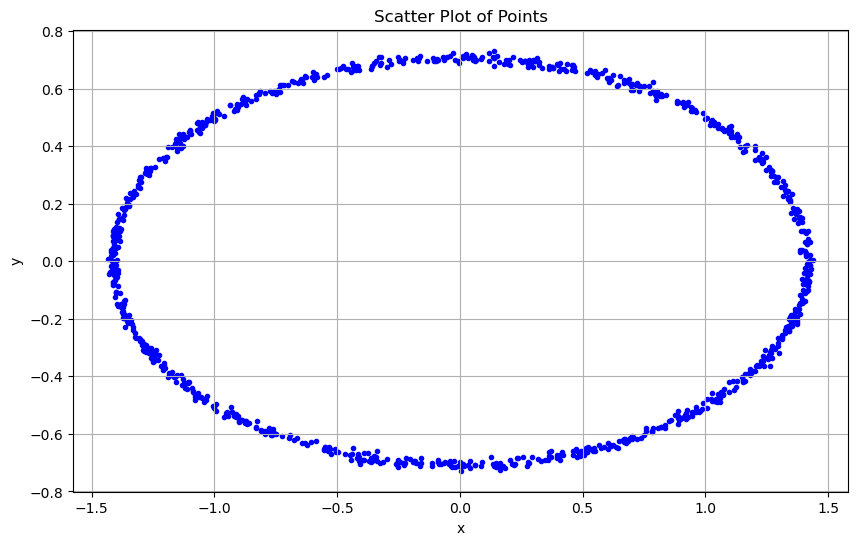

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], c='blue', marker='.')
plt.title('Scatter Plot of Points')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
# we need A a, and b
# where A is 1000*2, a is 2*1 matrix, b is 1000*1 matrx
b = np.ones(1000)
print(b.shape)

# construct a, but we just need to pick a random initial value
# np.zeros(2)
a = np.random.rand(2)
print(a.shape)

(1000,)
(2,)


In [4]:
# A, should be 1000*2
x = df['x'].values
print(x[:5])
y = df['y'].values
print(y[:5])

# vertical stacks
A = np.vstack((x**2, y**2)).T #.T to transpose
A.shape


[ 1.0954   -1.1371   -1.2984   -0.16411  -0.097869]
[ 0.44448 -0.39561  0.2929  -0.71101  0.69414]


(1000, 2)

### (c) create computer code to compute the gradient descent algorithm on this f(a)

In [5]:
def gradient_decent(x, y, iters=1000, stopping_con=0.000001):
    # stopping condition

    # A is 1000*2, a is 2*1 matrix, b is 1000*1 matrix
    # vertical stacks
    A = np.vstack((x**2, y**2)).T #.T to transpose
    b = np.ones(1000)
    # construct a, but we just need to pick a random initial value
    # np.zeros(2)
    a = np.random.rand(2)

    # Step size
    X = A.T @ A
    m = 1/(2 * np.linalg.norm(X, 2))

    for i in range(iters):
        # Gradient of f(a)
        g = 2 * A.T @ (A @ a - b)

        # updating
        a = a - m * g

        if np.linalg.norm(g, 2) < stopping_con:
            break

    return a

estimated_a = gradient_decent(x, y)
f_a = (A @ estimated_a - b).T @ (A @ estimated_a - b)

print("The estimated_a after gradient decent are: ", estimated_a)
print("The f(a) after gradient decent are: ", f_a)


The estimated_a after gradient decent are:  [0.49992583 1.99820292]
The f(a) after gradient decent are:  0.47825669817103644


### (d) Using the data provided and your gradient descent code, estimate the solution a. Report a and f(a). Given f(a) and N, do you think you fit the data well or poorly? Given the convexity of f, do you think this is the optimal a?

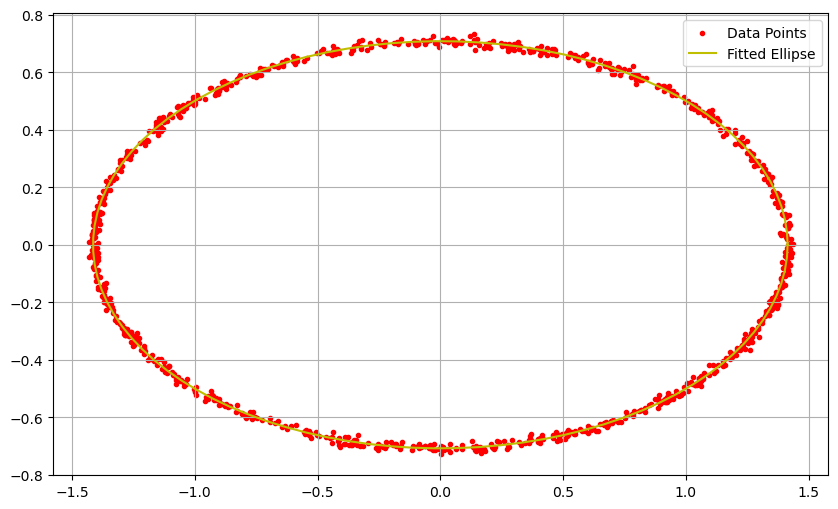

In [6]:
theta = np.linspace(0, 2* np.pi, 100)
x_f = np.sqrt(1 / estimated_a[0]) * np.cos(theta)
y_f = np.sqrt(1/ estimated_a[1]) * np.sin(theta)

plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], c='red', marker='.', label='Data Points')

plt.plot(x_f, y_f, 'y', label='Fitted Ellipse')
plt.legend()
plt.grid(True)
plt.show()


##### **Fit** - f(a) is evaluating the error between any (xi, yi) in the dataset with the ellipse. The lower the f(a) represent the lower aggregate square error. Giving the entries of 1000 columns where the square error is 0.48, I will say that we fit the data well. 

##### **Optimal a** - Given the function f(a) to be convex, we are likely to arrived at a global minimum and since the step size and stopping condition are optimal, it is likely we are at the optimal solution.